In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
#Reference Material
# demographics_reflection_solution.ipynb
# dow_dates_solution.ipynb
# https://www.geeksforgeeks.org/python-datetime-timedelta-function/
# https://stackoverflow.com/questions/8551952/how-to-get-last-record
# https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
# https://stackoverflow.com/questions/17223174/returning-distinct-rows-in-sqlalchemy-with-sqlite
# https://stackoverflow.com/questions/1052148/group-by-count-function-in-sqlalchemy
# https://stackoverflow.com/questions/4186062/sqlalchemy-order-by-descending
# https://stackoverflow.com/questions/3750118/sqlalchemy-0-5-8-max-function

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
# COLUMNS: date, prcp, tobs
last_date = session.query(Measurements).order_by(Measurements.date.desc()).first()
print(last_date.date)

2017-08-23


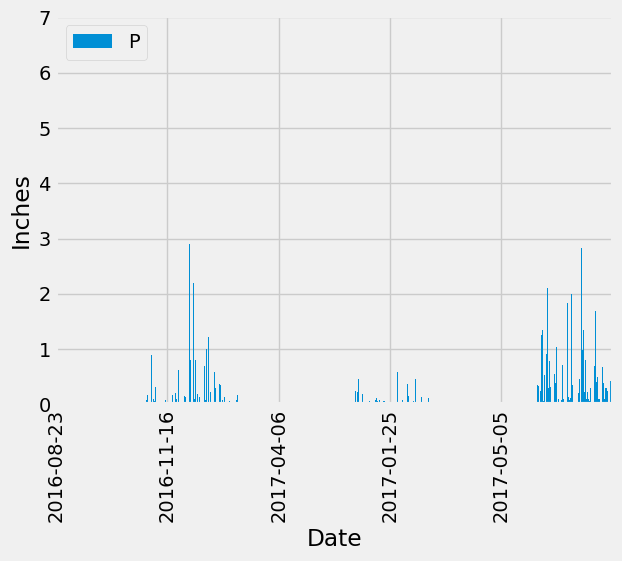

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_span = dt.date(2017, 8, 23) - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores
one_year_history = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= one_year_span).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(one_year_history, columns = ['Date', 'Inches'])
df.set_index('Date', inplace=True)

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(kind='bar')
plt.locator_params(axis='x', nbins=5)
plt.xticks(rotation=90)
plt.ylabel("Inches")
plt.legend("Precipitation")
plt.show()

In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_description = df.describe()
df_description

,Inches
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
query = session.query(Measurements.station).distinct().count()
query

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counter = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station).desc()).all()
station_counter   


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = station_counter[0][0]

sel = [func.min(Measurements.tobs), func.max(Measurements.tobs), func.avg(Measurements.tobs)]
most_active_station = session.query(*sel).filter(Measurements.station == most_active)
for record in most_active_station:
    print(record)


(54.0, 85.0, 71.66378066378067)


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
one_year_history = session.query(Measurements.station, Measurements.tobs).filter(Measurements.station == most_active).all()

df = pd.DataFrame(one_year_history, columns = ['Temperature', 'Frequency'])



# Close Session

In [ ]:
# Close Session
session.close()